<a href="https://colab.research.google.com/github/kingajutrzenka/_ML-Bootcamp-2/blob/main/Grupowanie_hierarchiczne/grupowanie_hierarchiczne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Grupowanie hierarchiczne**

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Wizualizacja - dendrogram](#3)
5. [Grupowanie hierarchiczne](#4)
6. [Wizualizacja klastrów](#5)
7. [Porównanie metryk (euklidesowa, Manhattan, kosinusowa)](#6)


### <a name='0'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(font_scale=1.2)

### <a name='1'></a> Wygenerowanie danych

In [ ]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=10, centers=2, cluster_std=1.0, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])
df.head()

,x1,x2
0,1.986985,1.016248
1,-2.470776,6.745699
2,-0.428145,7.978864
3,2.699072,1.892783
4,-2.241511,6.977292


### <a name='2'></a> Wizualizacja danych

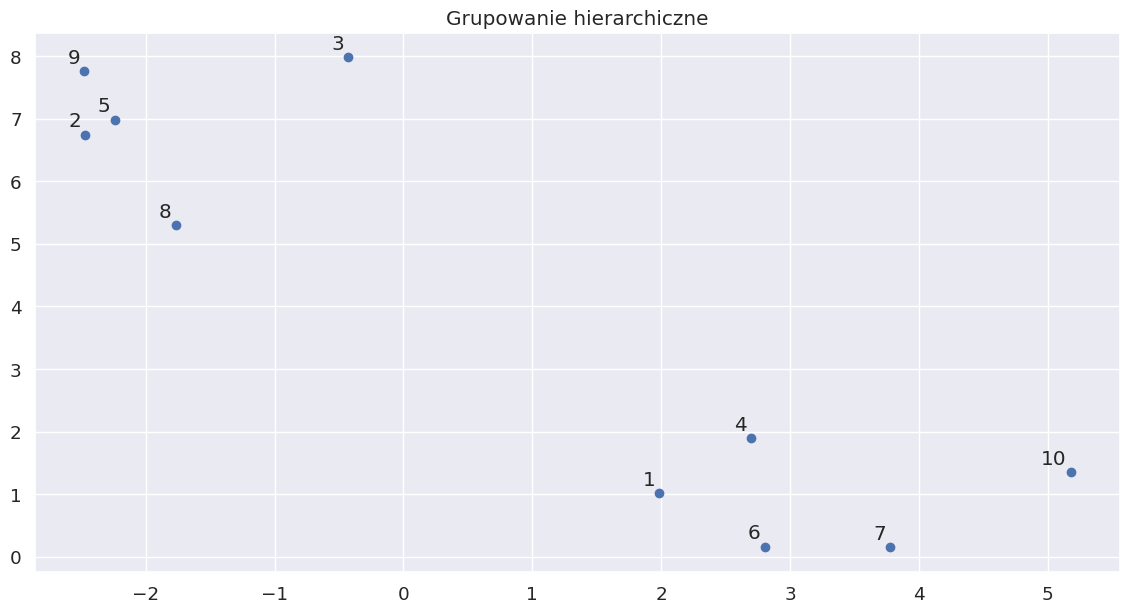

In [ ]:
plt.figure(figsize=(14, 7))
plt.scatter(data[:,0], data[:,1])

for label, x, y in zip(range(1, 11), data[:, 0], data[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
plt.title('Grupowanie hierarchiczne')
plt.show()

### <a name='3'></a> Wizualizacja - dendrogram

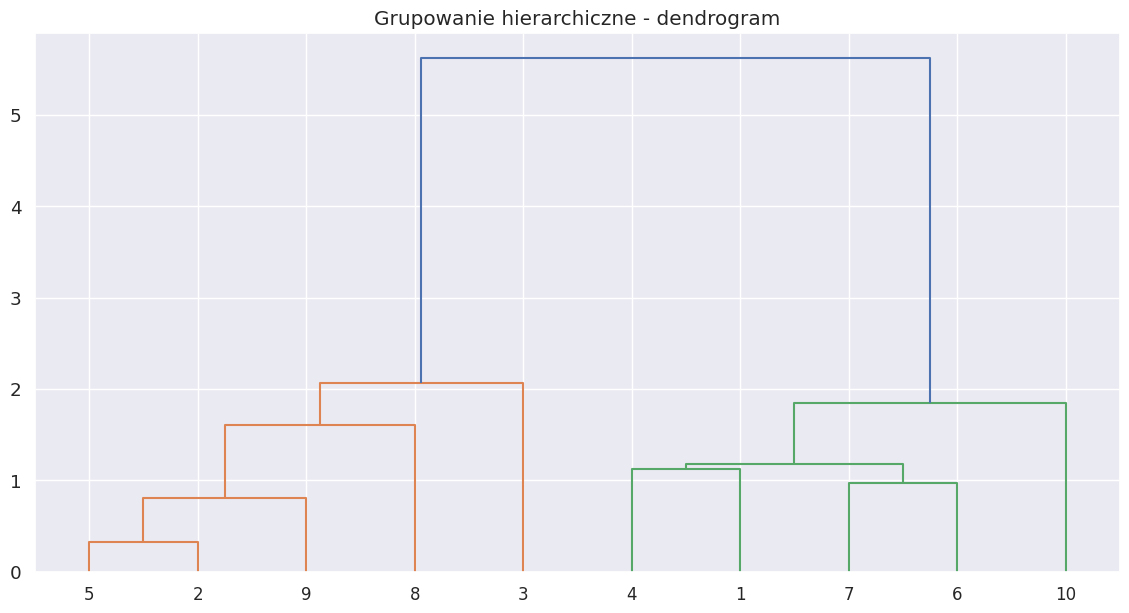

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

# przeprowadzenie grupowania hierarchicznego
linked = linkage(data)

# wizualizacja grupowania hierarchicznego jako dendrogram
plt.figure(figsize=(14, 7))
dendrogram(linked, orientation='top', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

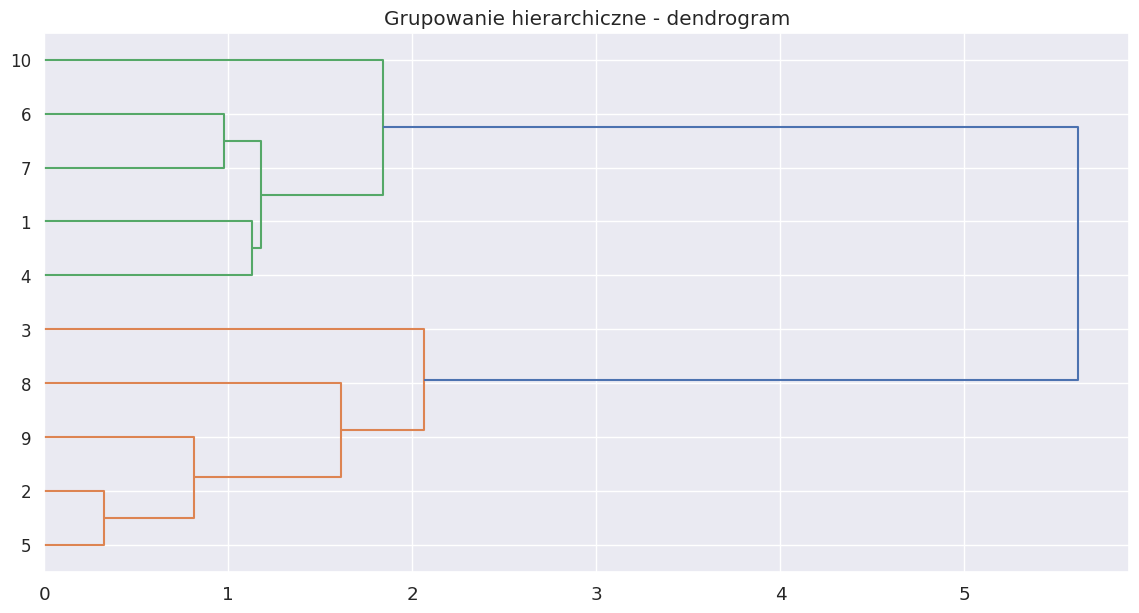

In [ ]:
plt.figure(figsize=(14, 7))
dendrogram(linked, orientation='right', labels=range(1, 11), distance_sort='descending', show_leaf_counts=True)
plt.title('Grupowanie hierarchiczne - dendrogram')
plt.show()

### <a name='4'></a> Grupowanie hierarchiczne

In [ ]:
# bottom-up approach
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2)
cluster.fit_predict(data)

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0])

### <a name='5'></a> Wizualizacja klastrów

In [ ]:
df = pd.DataFrame(data, columns=['x1', 'x2'])
df['cluster'] = cluster.labels_

fig = px.scatter(df, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne', color_continuous_midpoint=0.6)
fig.update_traces(marker_size=12)
fig.show()

### <a name='6'></a> Porównanie metryk (euklidesowa, Manhattan, kosinusowa)

In [ ]:
data = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)[0]
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=950, height=500, title='Grupowanie hierarchiczne', template='plotly_dark')

Odległość euklidesowa

In [ ]:
cluster_euclidean = AgglomerativeClustering(n_clusters=4)
cluster_euclidean.fit_predict(data)

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 0, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 3, 0, 2, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 0, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 0, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 0, 1, 2, 0, 3, 2, 0, 2, 1, 0, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

In [ ]:
df_euclidean = pd.DataFrame(data, columns=['x1', 'x2'])
df_euclidean['cluster'] = cluster_euclidean.labels_
fig = px.scatter(df_euclidean, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka euklidesowa', color_continuous_midpoint=0.6)
fig.show()

Metryka Manhattan

In [ ]:
cluster_manhattan = AgglomerativeClustering(n_clusters=4, metric='manhattan', linkage='complete')
cluster_manhattan.fit_predict(data)

array([0, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 0, 0, 3, 3, 3, 0, 0, 0, 2, 2, 0,
       1, 1, 2, 2, 0, 0, 3, 2, 3, 3, 3, 0, 0, 1, 3, 2, 1, 1, 2, 3, 2, 1,
       2, 0, 0, 2, 1, 2, 3, 0, 2, 1, 0, 1, 0, 0, 0, 3, 3, 0, 3, 0, 2, 0,
       3, 3, 2, 0, 0, 0, 2, 3, 2, 1, 2, 0, 2, 0, 3, 0, 0, 0, 2, 0, 3, 3,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 3, 2, 1, 1, 1, 1, 2, 2, 0, 3, 0,
       1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 0, 3, 1, 2, 1, 3, 2, 1, 3, 2, 0, 3,
       2, 1, 2, 0, 0, 3, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 0, 1, 3, 3,
       1, 2, 0, 2, 2, 1, 3, 0, 2, 3, 0, 0, 2, 3, 0, 3, 2, 0, 1, 2, 0, 0,
       3, 1, 3, 1, 2, 2, 0, 3, 0, 3, 2, 1, 0, 3, 2, 0, 2, 2, 0, 0, 3, 3,
       3, 1, 0, 3, 2, 0, 2, 2, 3, 0, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 1, 2,
       0, 1, 3, 0, 1, 0, 2, 3, 3, 0, 0, 3, 0, 1, 3, 3, 1, 3, 3, 2, 3, 1,
       3, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 2, 2, 1, 2,
       1, 0, 3, 2, 0, 1, 2, 0, 2, 3, 0, 0, 2, 1, 3, 2, 0, 3, 1, 2, 3, 0,
       0, 3, 0, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3,

In [ ]:
df_manhattan = pd.DataFrame(data, columns=['x1', 'x2'])
df_manhattan['cluster'] = cluster_manhattan.labels_
fig = px.scatter(df_manhattan, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka Manhattan', color_continuous_midpoint=0.6)
fig.show()

Odległość kosinusowa

In [ ]:
cluster_cosine = AgglomerativeClustering(n_clusters=4, metric='cosine', linkage='complete')
cluster_cosine.fit_predict(data)

array([2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 2, 1, 1, 1, 2, 2, 3, 0, 0, 2,
       2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 0, 1, 0, 2,
       0, 2, 2, 0, 2, 0, 1, 3, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 3, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 3, 0, 2, 1, 2,
       2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1, 0, 2, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 1,
       2, 0, 2, 0, 0, 2, 1, 2, 3, 1, 3, 2, 0, 1, 2, 1, 0, 3, 2, 0, 2, 2,
       1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 3, 2, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2,
       1, 0, 2, 3, 3, 2, 0, 0, 3, 0, 2, 0, 0, 1, 2, 1, 1, 0, 0, 3, 2, 0,
       2, 2, 1, 0, 3, 2, 0, 3, 0, 1, 2, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 3,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [ ]:
df_cosine = pd.DataFrame(data, columns=['x1', 'x2'])
df_cosine['cluster'] = cluster_cosine.labels_
fig = px.scatter(df_cosine, 'x1', 'x2', 'cluster', width=950, height=500, template='plotly_dark',
                 title='Grupowanie hierarchiczne - metryka kosinusowa', color_continuous_midpoint=0.6)
fig.show()

In [ ]:
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=3, column_titles=['euclidean', 'Manhattan', 'cosine'])

fig1 = px.scatter(df_euclidean, 'x1', 'x2', 'cluster')['data'][0]
fig2 = px.scatter(df_manhattan, 'x1', 'x2', 'cluster')['data'][0]
fig3 = px.scatter(df_cosine, 'x1', 'x2', 'cluster')['data'][0]

fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)
fig.add_trace(fig3, row=1, col=3)
fig.update_layout(template='plotly_dark')
fig.show()